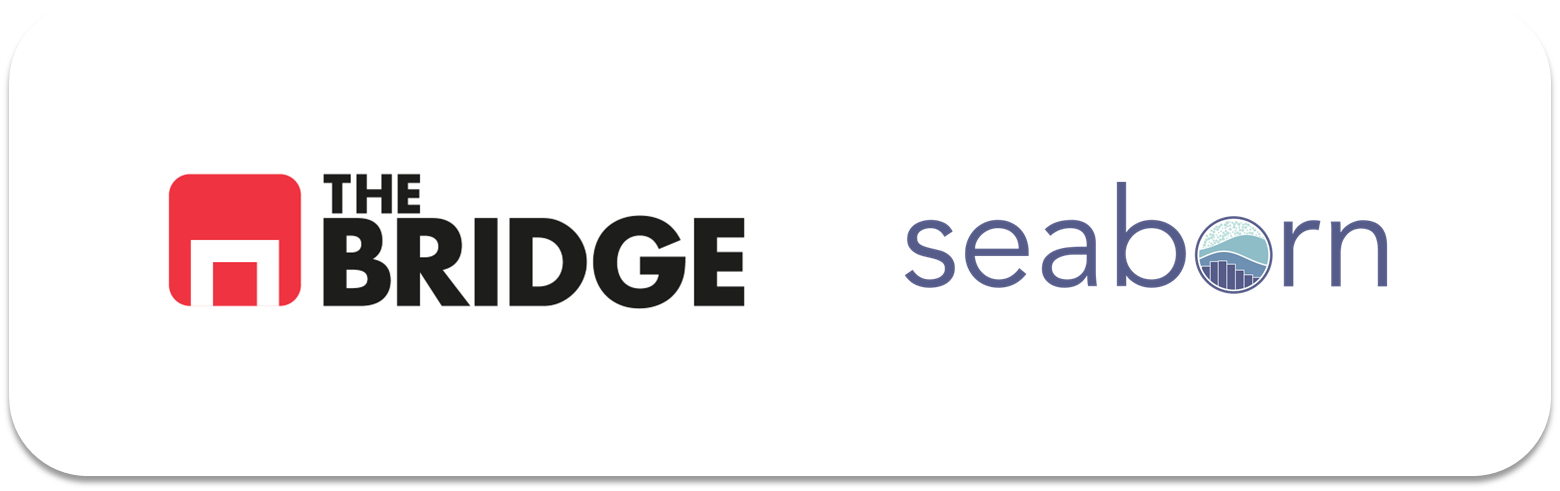

# Visualización Aplicada: Mostrando una Variable Categórica

Nos centramos ahora en visualizar una única variable (tanto para análisis como presentación). Dividimos en dos grupos categóricas y númericas. En esta sesión trataremos las categóricas.

Lo primero, importamos librerías y cargamos datos:

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

### Gráficas y consideraciones

Veremos las siguientes:
- Diagrama de barras para frecuencias
- Diagrama de esferas/círculos para frecuencias
- Quesos, donuts y otras cosas de comer: lolipops


#### Consideraciones generales: 

* **Cuándo**: Análisis univariante de frecuencias y presentación de distribución de valores cuando esto aporte algo (en general para introducciones y dar contexto). Los diagramas de tarta y queso funcionan mejor con frecuencias relativas que con absolutas. Los lolipops no son de mi gusto, pero para que tengas otros.

* **Cuándo no**: Incluso en la situación de que sea necesario por dar contexto hablar de los valores de una variable categórica, si la cardinalidad es mayor de 5 (más o menos) reducirla mostrando 4-5 valores como mucho colapsando los no interesantes en un grupo "otros" (ojo, los no interesantes no son los de menor frecuencia son los que no aporten nada a los mensajes a transmitir )

### Barras

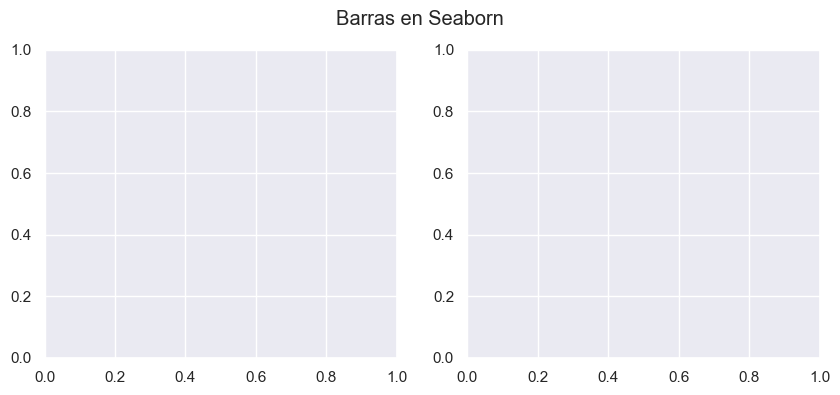

In [8]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Barras en Seaborn");



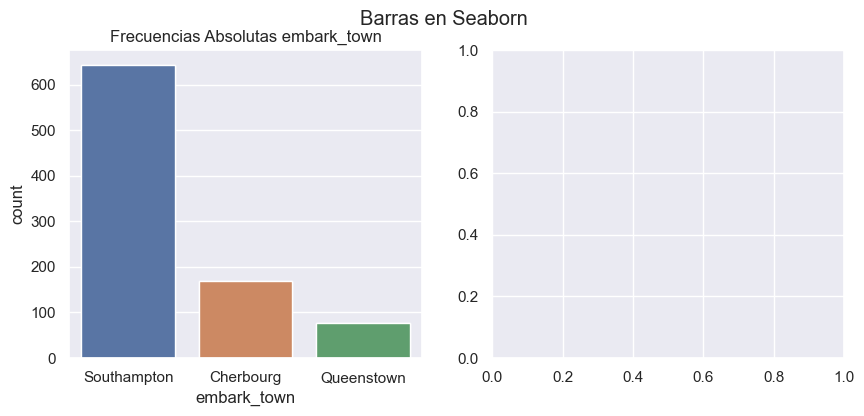

In [10]:
### Countplot, nos permite frecuencias
sns.countplot(x= "embark_town", data = df_titanic, ax = axs[0], hue = "embark_town", legend = False)
axs[0].set_title("Frecuencias Absolutas embark_town")
fig

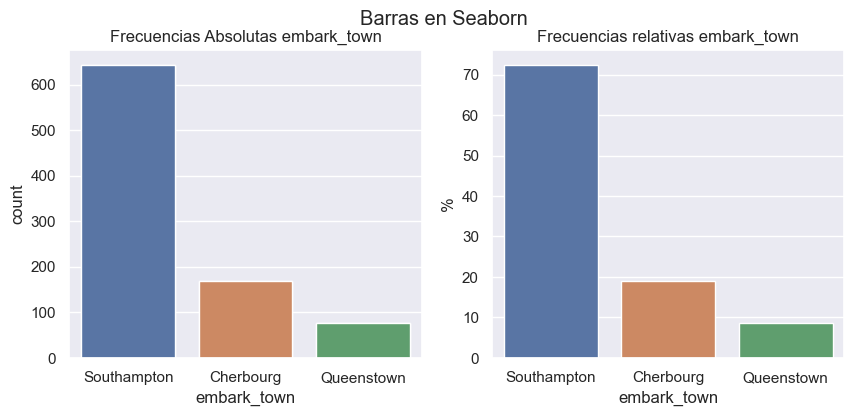

In [11]:
# Para frecuencias relativas... también hay que calcularlas previamente y puedes usar el barplot (si parecido a matplotlib)
valores = df_titanic.embark_town.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas embark_town")
axs[1].set_ylabel("%")
fig

### Circulos

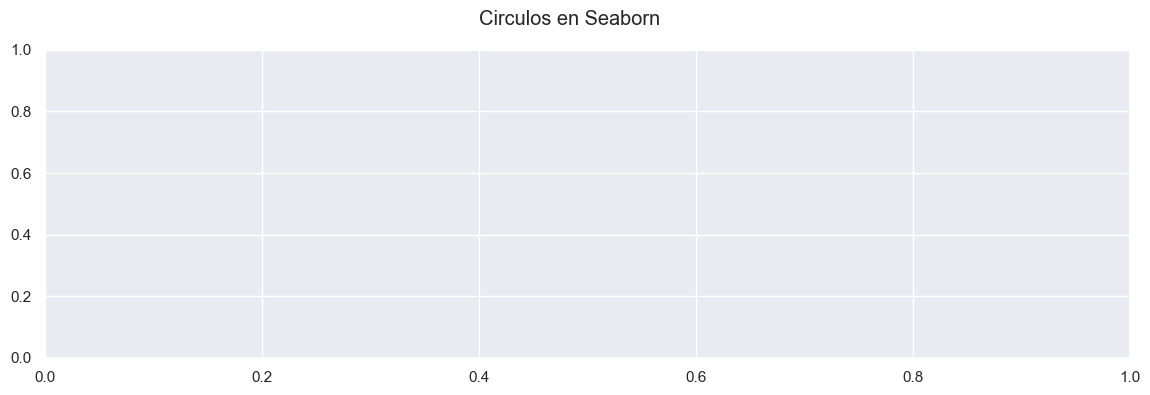

In [13]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1, ncols=1, figsize=(14,4))
fig.suptitle("Circulos en Seaborn");


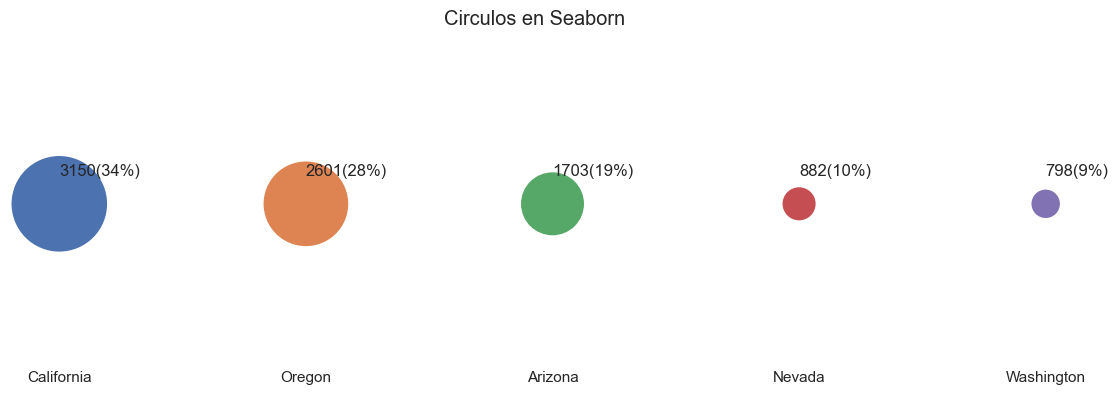

In [14]:
### Frecuencias absolutas y relativas

frecuencias = df_seguros["state"].value_counts()
df_frecuencias = df_seguros["state"].value_counts().reset_index()
df_frecuencias.columns = ["categorias","frecuencias"]
sns.scatterplot(x = "categorias", y = [1]*len(frecuencias), hue = "categorias", data = df_frecuencias, size = "frecuencias", legend = False, ax = axs, sizes = (500,5000))
axs.set_xlabel("")
for estado,valor in frecuencias.items():
    axs.text(estado,1.01,f"{valor}({round(valor*100/frecuencias.sum())}%)")
axs.set_facecolor("none")
axs.yaxis.set_ticks([])
fig

### Donuts, tartas, quesos

Seaborn no viene con ellos, así que usamos matplotlib, empezamos con la tarta/queso:

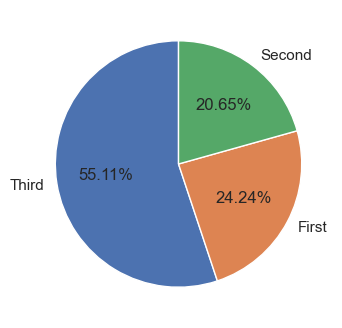

In [15]:
data = df_titanic["class"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90);

Ahora tipo donut:

### Lolipops

Este tampoco lo tenemos en seaborn:

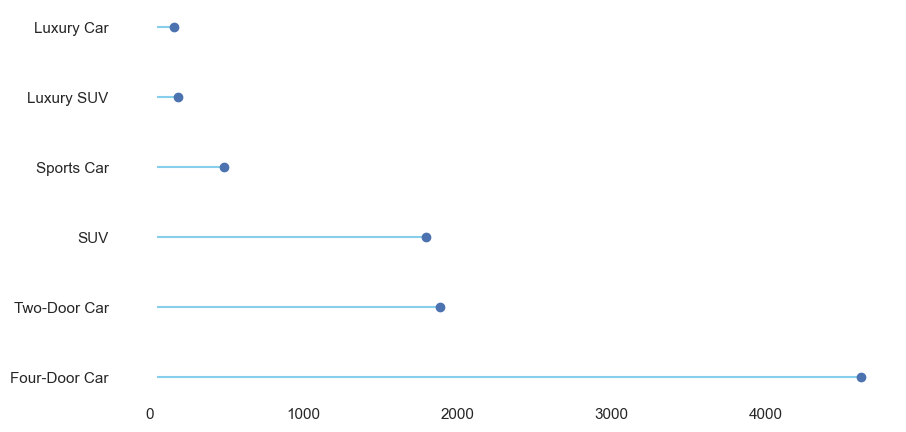

In [16]:
conteo = df_seguros['vehicle_class'].value_counts(ascending=False)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin= 50,
           xmax=conteo,
           color='skyblue')
p=plt.gcf()
p.gca().set_facecolor("none")
plt.plot(conteo, conteo.index, "o");
